# Airline Analysis

In this project, I'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for my clients. I want to make sure that I can find the best deal for my client and help them to understand how airline prices change based on different factors.

I decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, I'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.


In order to get the plots to appear correctly in the notebook, I'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import statistics

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
max_coach_price = max(flight['coach_price'])
print(f" Maxium coach ticket price is : " , max_coach_price)

min_coach_price = min(flight['coach_price'])
print(f" Minimum  coach ticket price is : " , min_coach_price)


average = statistics.mean(flight['coach_price'])
print(f" Average coach ticket price is : ", average)

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
 Maxium coach ticket price is :  593.635
 Minimum  coach ticke

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

     miles  passengers  delay inflight_meal inflight_entertainment  \
75    4182         209      0           Yes                    Yes   
81    4158         213      0            No                    Yes   
111   4269         217      0            No                     No   
290   4239         221      0            No                    Yes   
295   4131         230      0            No                     No   

    inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
75            Yes   Wednesday     No      No      416.320           1441.36   
81            Yes    Saturday     No     Yes      474.350           1712.92   
111           Yes      Sunday     No     Yes      407.125           1614.34   
290           Yes    Saturday     No     Yes      432.905           1678.51   
295           Yes      Friday     No     Yes      406.565           1591.73   

     hours  
75       8  
81       8  
111      8  
290      8  
295      8  
75        416.320
81      

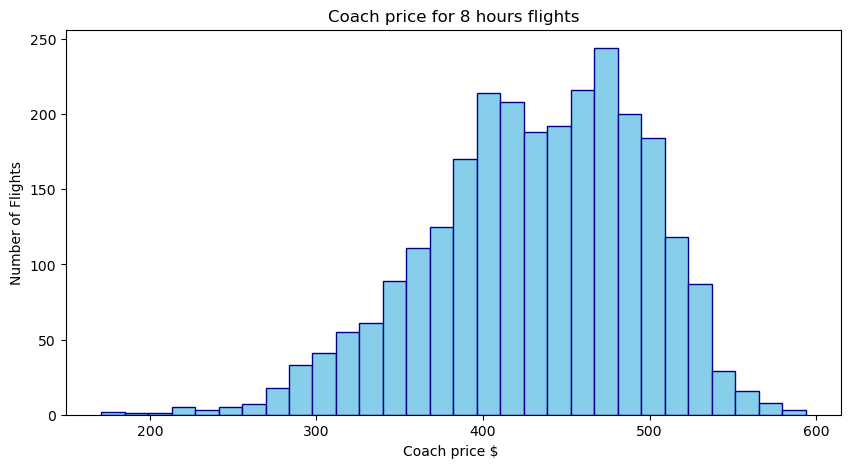

In [31]:
## Task 2
eight_hours_flight = flight[flight['hours'] == 8]
print(eight_hours_flight.head())

coach_prices = eight_hours_flight['coach_price']
print(coach_prices)


min_price = coach_prices.min()
max_price = coach_prices.max()
avg_price = coach_prices.mean()


print (f"min_price :", min_price)
print (f"max_price : ", max_price)
print (f" average price :", avg_price)
print(coach_prices.dtype)

plt.figure(figsize=(10,5))
plt.hist(coach_price, bins = 30 , color = "skyblue", edgecolor = "darkblue")
plt.title("Coach price for 8 hours flights")
plt.xlabel("Coach price $ ")
plt.ylabel("Number of Flights")
plt.show()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

Max delay minutes :  1560
Minimum delay minutes :  0
Average delay minutes :  13.162844814301126
Standart deviation of  delay minutes :  41.94168007146328
General describe of delay column   count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


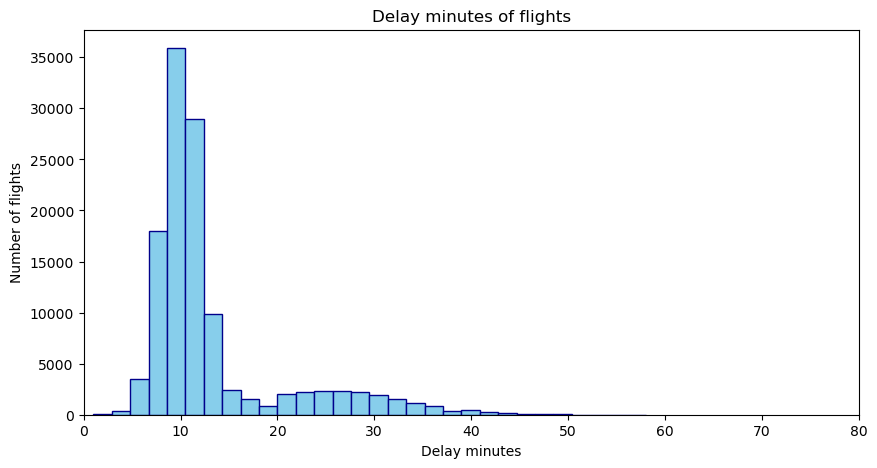

In [51]:
## Task 3
print(f"Max delay minutes : ", flight['delay'].max())
print(f"Minimum delay minutes : ", flight['delay'].min())
print(f"Average delay minutes : ", flight['delay'].mean())
print(f"Standart deviation of  delay minutes : ", flight['delay'].std())
print(f"General describe of delay column  ", flight['delay'].describe())

flight_delay = flight[(flight['delay']>0) & (flight['delay'] <=500)]
plt.figure(figsize=(10,5))
plt.hist(flight_delay['delay'], bins = 30 , color = "skyblue", edgecolor= "darkblue" )
plt.title("Delay minutes of flights")
plt.xlabel("Delay minutes")
plt.ylabel("Number of flights")
plt.xlim(0,80)
plt.show()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

 Maximum coach price  is : 593.635
 Maximum first class price is :  1846.78


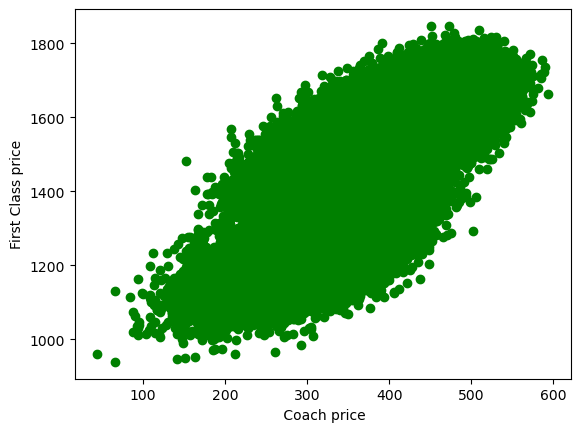

In [54]:
## Task 4
coach_price= flight['coach_price']
first_class_price = flight['firstclass_price']
print(f" Maximum coach price  is :" , coach_price.max())
print(f" Maximum first class price is : ", first_class_price.max())


plt.scatter(coach_price,first_class_price, color = "green")
plt.xlabel(" Coach price")
plt.ylabel("First Class price")
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

4         374.735
5         435.670
7         467.290
10        455.265
11        459.380
           ...   
129760    406.550
129765    335.095
129766    427.105
129770    394.875
129772    474.210
Name: coach_price, Length: 38967, dtype: float64
0         338.820
1         472.655
2         351.960
3         387.835
6         270.080
           ...   
129775    383.240
129776    397.825
129777    380.980
129778    485.185
129779    446.395
Name: coach_price, Length: 90813, dtype: float64


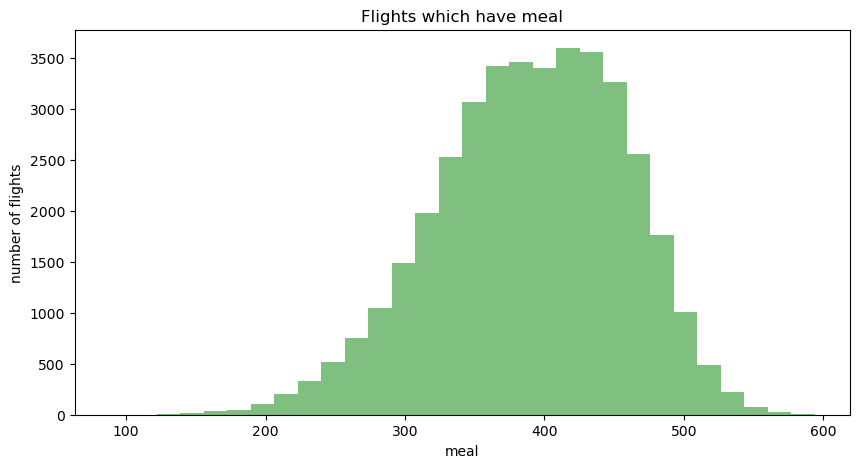

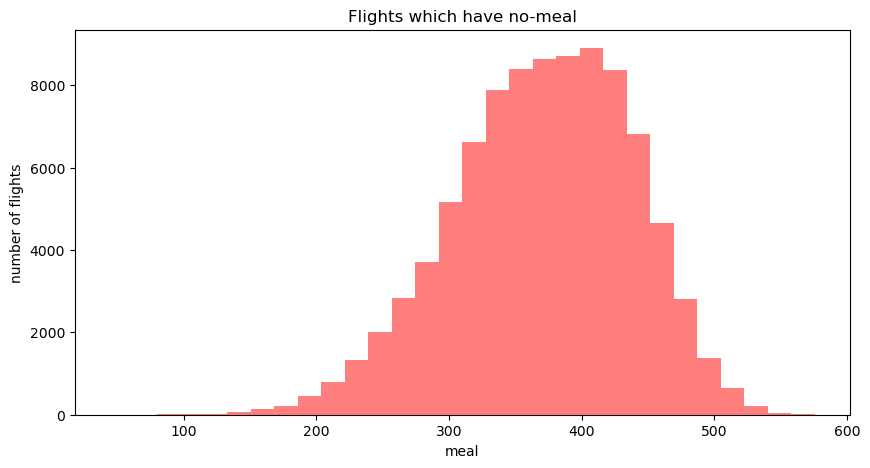

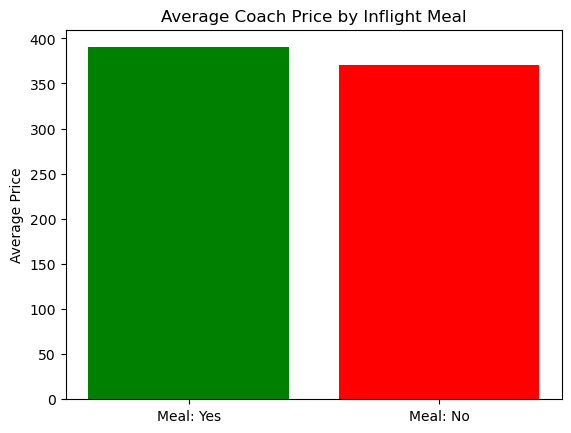

In [67]:
## Task 5
meal_true = flight[flight['inflight_meal'] == "Yes"]
meal_false = flight[flight['inflight_meal'] == "No"]

meal_true_price = meal_true["coach_price"]
meal_false_price = meal_false["coach_price"]
print(meal_true_price)
print(meal_false_price)

plt.figure(figsize=(10,5))
plt.hist(meal_true_price, bins=30, alpha =0.5, color="green")
plt.title("Flights which have meal")
plt.xlabel("meal")
plt.ylabel("number of flights")
plt.show()

plt.figure(figsize=(10,5))
plt.hist(meal_false_price, bins=30, alpha =0.5, color="red")
plt.title("Flights which have no-meal")
plt.xlabel("meal")
plt.ylabel("number of flights")
plt.show()


avg_true = meal_true_price.mean()
avg_false = meal_false_price.mean()

plt.bar(['Meal: Yes', 'Meal: No'], [avg_true, avg_false], color=['green', 'red'])
plt.title("Average Coach Price by Inflight Meal")
plt.ylabel("Average Price")
plt.show()


6. How does the number of passengers change in relation to the length of flights?

## Task 6
hours = flight['hours']
passengers=flight['passengers']
plt.figure(figsize=(8,4))
plt.scatter(hours, passengers, color='purple', alpha=0.2)
plt.title("Distribution of Flight Hours - Passengers")
plt.xlabel("Flight hours")
plt.ylabel("Number of passengers")
plt.show()


# other way of showing relationship 
import seaborn as sns
sns.lmplot(x='hours', y='passengers', data=flight, lowess=True)

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

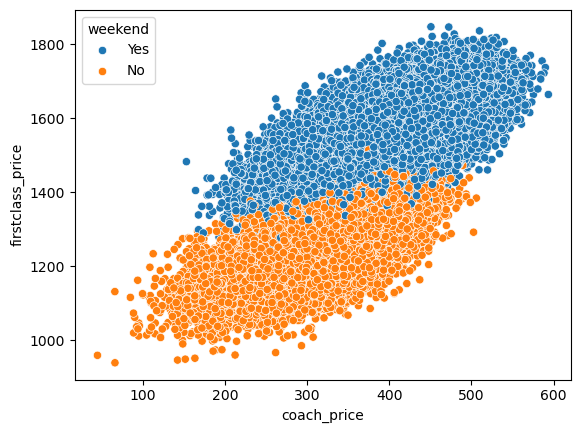

In [86]:
## Task 7

sns.scatterplot(x='coach_price', y='firstclass_price', hue='weekend', data= flight)
plt.show()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

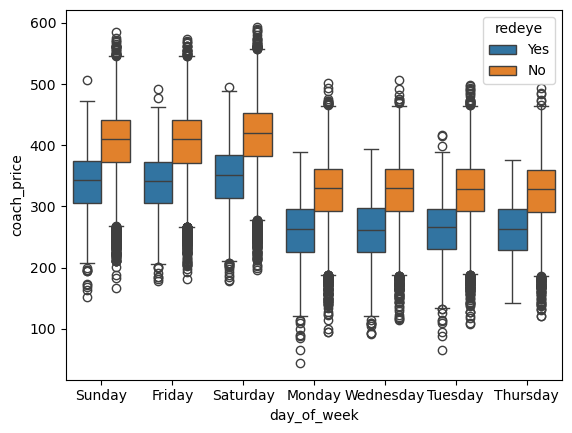

In [6]:
## Task 8
sns.boxplot(x='day_of_week', y='coach_price', hue ='redeye', data = flight)
plt.show()
